
# Modelo Logit para la prediccion de que el precio de un acción incremente


## Introducción

En este estudio se analizará una pequeña parte del mercado secundario financiero, por medio de la econometría usando diversas acciones de diferentes sectores que cotizan en este mismo. El modelo será logístico y probabilístico. Las muestras tomadas fueron tomadas del portal Yahoo Finance del día 5 de junio del 2020. Se utilizó una muestra de 100 acciones, dentro de las cuales 50 fueron las que más subieron en ese día y las otras restantes las que más decrecieron.
La variable dependiente escogida fue el cambio en el precio y transformada a una variable dicotómica, que, por medio de la dualidad negativa (0) o positiva (1), determinará si es que hubo un cambio en los precios (CP), con variables independientes representadas por Volumen (cantidad de acciones que fueron comerciadas ese día, en millones), Capitalización de mercado (mide la dimensión del mercado, es decir, el precio de la acción por la cantidad de acciones en circulación, en billones) y Price to Earnings Ratio(P_E, el cual indica cuantas veces se esta pagando el beneficio neto de una empresa al comprar una acción.
El modelo entonces queda así:

CP=〖logit(B〗_0+B_1 VOL+ B_2 MC +B_3 P_E+ u)

Con este modelo se pretende tener una guía más acertada para poder entrar al mercado bursatil y tener las bases que puedan aumentar la probabilidad de ganar en el mercado accionario.
Para este modelo se utilizo la literatura de Carrasco Bañuelos, E. y García Pérez, E

https://www.redalyc.org/pdf/2741/274120410006.pdf

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("ACCIONES.csv")
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,OXY,Occidental Petroleum Corporation,20.79,5.24,0.34,114.52,49.12,19.06,NaN
1,AAL,American Airlines Group Inc.,18.59,1.87,0.11,428.62,82.49,7.86,5.26
2,AGI,Alamos Gold Inc.,7.46,-0.26,-0.03,3.26,4.02,2.93,43.88
3,ALNY,"Alnylam Pharmaceuticals, Inc.",127.59,-4.31,-0.03,0.61,0.86,14.65,NaN
4,APA,Apache Corporation,16.07,3.07,0.24,35.02,24.66,6.07,NaN


In [24]:
df['U_D'] = (df['Change'] > 0).astype(float)
df

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),U_D
0,OXY,Occidental Petroleum Corporation,20.79,5.24,0.34,114.52,49.12,19.06,NaN,1.0
1,AAL,American Airlines Group Inc.,18.59,1.87,0.11,428.62,82.49,7.86,5.26,1.0
2,AGI,Alamos Gold Inc.,7.46,-0.26,-0.03,3.26,4.02,2.93,43.88,0.0
3,ALNY,"Alnylam Pharmaceuticals, Inc.",127.59,-4.31,-0.03,0.61,0.86,14.65,NaN,0.0
4,APA,Apache Corporation,16.07,3.07,0.24,35.02,24.66,6.07,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
95,XEC,Cimarex Energy Co.,32.25,3.22,0.11,1.89,2.97,3.29,6.52,1.0
96,Z,"Zillow Group, Inc.",59.32,-2.10,-0.03,4.01,4.78,13.10,NaN,0.0
97,ZG,"Zillow Group, Inc.",59.52,-1.86,-0.03,1.04,1.06,13.16,NaN,0.0
98,ZNH,China Southern Airlines Company Limited,25.20,2.59,0.11,0.17,0.06,9.02,11.20,1.0


In [25]:
#Renpmbramos las variables y borramos los NA
df = df.rename(columns={"Avg Vol (3 month)" : "Avg" , "PE Ratio (TTM)" : "P_E" , "Market Cap" : "Market_Cap"}).dropna()
df

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg,Market_Cap,P_E,U_D
1,AAL,American Airlines Group Inc.,18.59,1.87,0.11,428.62,82.49,7.86,5.26,1.0
2,AGI,Alamos Gold Inc.,7.46,-0.26,-0.03,3.26,4.02,2.93,43.88,0.0
6,AU,AngloGold Ashanti Limited,23.82,-1.08,-0.04,6.88,4.38,9.91,46.80,0.0
7,AUB,Atlantic Union Bankshares Corporation,27.16,2.89,0.12,0.39,0.48,2.14,11.27,1.0
10,BEPTF,Beach Energy Limited,1.29,0.13,0.11,0.03,0.01,2.94,18.97,1.0
11,BOKF,BOK Financial Corporation,63.89,6.40,0.11,0.41,0.45,4.49,10.02,1.0
12,CCL,Carnival Corporation & Plc,21.51,3.03,0.16,110.19,71.54,16.83,4.98,1.0
13,CIT,CIT Group Inc.,26.50,3.20,0.14,4.92,2.97,2.61,5.58,1.0
15,CLR,"Continental Resources, Inc.",18.43,3.06,0.20,7.56,7.49,6.73,17.00,1.0
16,CLX,The Clorox Company,197.57,-6.68,-0.03,2.88,2.49,24.88,31.41,0.0


In [26]:
print(type(df["Volume"]))

<class 'pandas.core.series.Series'>


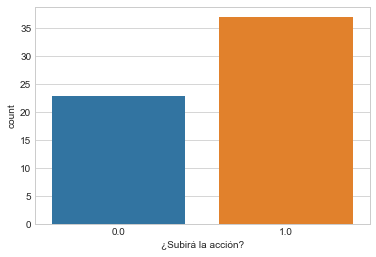

In [27]:
#Gráfica 1: Acciones que tubieron un efecto alcista contra aquellas que fueron bajistas
sns.countplot(x="U_D", data = df)
plt.xlabel("¿Subirá la acción?")
plt.style.use('seaborn-whitegrid')

Como se puede ver el día que fue tomada la muestra se dió un efecto alcista, ya que las probabilidades de subir (35%),
fueron mayores que las de que bajaran (23% aprox). 

Text(0, 0.5, 'Acciones')

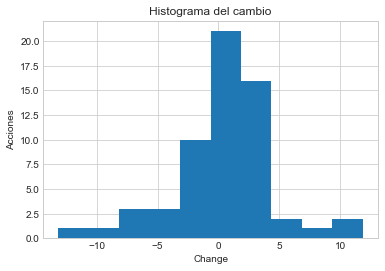

In [28]:
df.Change.hist()
plt.title('Histograma del cambio')
plt.xlabel('Change')
plt.ylabel('Acciones')



El histograma representa cómo se distribuyen los cambios en dólares de la acción con respecto a su precio anterior. Se puede observar que la gráfica se encuntra más cargada hacia la derecha, lo cual quiere decir que la mayor parte de las acciones tuvo un incremente de 0 a 4 dólares en el precio. Además, muy pocas acciones variaron en su precio más de 5 dólares, ya sea negativa o positivamente

In [35]:
modelo = logit("U_D ~ Volume + Market_Cap + P_E",df)

In [36]:
modelo_est = modelo.fit()
print(modelo_est.summary())

Optimization terminated successfully.
         Current function value: 0.220888
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    U_D   No. Observations:                   60
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                  0.6682
Time:                        13:40:43   Log-Likelihood:                -13.253
converged:                       True   LL-Null:                       -39.940
Covariance Type:            nonrobust   LLR p-value:                 1.526e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0908      1.240      3.299      0.001       1.661       6.521
Volume         0.3358      0

De acuerdo al modeloLogit realizado, se puede demostrar la correlación que siguen las variables independientes con la probabilidad de que una acción incremente respecto de su precio del día anterior. El volumen afecta positivamente a que una acción incremente su precio, mientras que el P/E ratio afecta negativamente, esto debido a que un incremento en el Price Earnings puede indicar que el precio de la acción esta sobrevalorado, por lo que el precio tendería a decrecer. Para el caso de la capitalización del mercado, esta no resultó estadísticamente significativa, sin embargo procederemos a realizar las siguientes pruebas para reforzar nuestro modelo.

In [31]:
modelo2 = logit("U_D ~ Volume + Market_Cap + P_E",df).fit()

params = modelo2.params
conf = modelo2.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))
np.exp(modelo2.params)


Optimization terminated successfully.
         Current function value: 0.220888
         Iterations 11
                  5%         95%  Odds Ratio
Intercept   5.262369  679.336332   59.790619
Volume      1.055481    1.854599    1.399105
Market_Cap  0.969601    1.109990    1.037424
P_E         0.697352    0.904243    0.794088


Intercept     59.790619
Volume         1.399105
Market_Cap     1.037424
P_E            0.794088
dtype: float64

Para complementar la utilidad de nuestras variables nos apoyaremos con los Odds ratio.
La variable de capitalización de mercado sigue siendo poco útil, ya que su valor es muy cercano al 1,
así como el volumen de las acciones En este caso su interpretación sería que hay una relacion de 1.4 a 1, siendo muy ligera.
Ahora bien el Price Earning ocurre una pequeña asociación entre la variable dependiente e 
independiente, ya que es menor a cero.
Para su interpretación le sacaremos la inversa +1/0.794088 siedo igual a 1.26 la relación al respecto.

In [32]:
modelo_margeff = modelo_est.get_margeff()
print(modelo_margeff.summary())

        Logit Marginal Effects       
Dep. Variable:                    U_D
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume         0.0225      0.007      3.098      0.002       0.008       0.037
Market_Cap     0.0025      0.002      1.116      0.264      -0.002       0.007
P_E           -0.0154      0.001    -14.776      0.000      -0.017      -0.013


Mediante los efectos marginales se anliza en qué magnitud afectan las variables explicativas a la variable dependiente. El volumen es el que más le pega, pues un incremento en 1 millón de acciones auemnta la probabilidad en un 2.25% a que una acción suba de precio. Por otro lado, para el caso del P/E ratio, un incremento de una unidad en este disminuye la probabilidad en 1.54% de que incremente el precio de la acción. La capitalización de mercado siguió siendo no significativa.

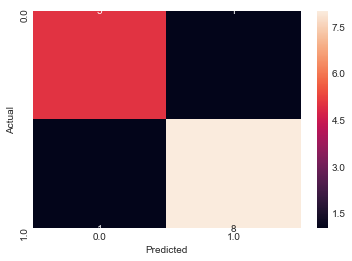

In [37]:
X= df[['Market_Cap', 'Volume', 'P_E']];
y= df['U_D']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Como complemento utilizaremos la matriz de porcentaje de predicción por medio de la matriz de confusión.
Para poderla graficar en Pandas, es necesario realizar una regresión, con ella se obtendrán tanto las X como las Y estimadas. Además, es necesario el hacerle una subdivisión a los datos.
Como se puede ver en la matriz las acciónes que bajaron fueron casi perfectamente clasificadas, ya que solo 
hubo un error de clasificación. En el lado de las acciones que fueron a la alza, la relación es de 8 a 1, a favor de 
los verdaderos negativos.
Para sacar la efectividad sumamos los Verdaderos positivos y negativos: 5 + 9 = 14
Por lo que: efectividad: 13/15 = 86.66%

In [38]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print (X_test) 
print (y_pred) 

    Market_Cap  Volume     P_E
45        7.47    0.26    6.58
61       18.77    7.50   23.62
98        9.02    0.17   11.20
48        2.80    0.06    5.85
18        2.45    1.02    5.57
6         9.91    6.88   46.80
58        3.65    0.02    3.84
95        3.29    1.89    6.52
71        6.91    1.16   23.38
39       32.27    0.03   45.98
10        2.94    0.03   18.97
17       12.09    4.88    4.12
53        5.79   62.41    6.73
72       11.07    0.03   46.07
56       10.76    1.19  526.64
[1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.]


Con nuestros datos dividos a un 25% como lo habíamos hecho para la matriz, lo que será es hacer una pequeña predicción 
de nuestra muestra total.
De 15 acciones muestra, se observa como es que 9 subirán y 5 bajarán ese día.
Dando un 66.66% a que eleven precios, contra un 33.33% a que bajen.

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8666666666666667
Precision: 0.8888888888888888
Recall: 0.8888888888888888


Para validar nuestra prueba de la matriz de confusión de hacemos unas pruebas de precisión y efectividad.
La presisión al de 88.8% es muy buena, si nuestra hipótesis es que subiran las acciones ese día, el 86.6% será la probabilidad 
que sucedad.
El recall , nos dice que nuestro modelo, al identifcar una acción a la alza será de 88.8% de probabilidad.

## Conclusión:
El modelo logró captar las relaciones que siguen las varaibles de volumen y P/E, por otro lado la capitalización de mercado de dicha empresa no logró ser significativa. De esta manera un inverionista podrá guiarse en estas variables para tener una mayor probabilidad de ganar en el mercado bursatil.

## Bibliografía: 
- https://datatofish.com/logistic-regression-python
- https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31
- https://finance.yahoo.com
- https://www.redalyc.org/pdf/2741/274120410006.pdf


## Sanchez López Eduardo Iván apoyo de González Carlos Rubén